<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Anna Tarelina (@feuerengel), and Mikhail Korshchikov (@MS4). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2019
## <center> Part 1. Decision trees for classification and regression

**In this assignment, we will find out how a decision tree works in a regression task, then will build and tune classification decision trees for identifying heart diseases.**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1-xvxl0xjV4voDYIbcCxxpAc_pjcWEpnLQ9kaKLHwXsA). Solutions will be shared only with those who've filled in this form 
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

## 1. Decision trees for regression: a toy example

Let's consider the following one-dimensional regression problem. We need to build a function $\large a(x)$ to approximate the dependency $\large y = f(x)$ using the mean-squared error criterion: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

Text(0,0.5,'$y$')

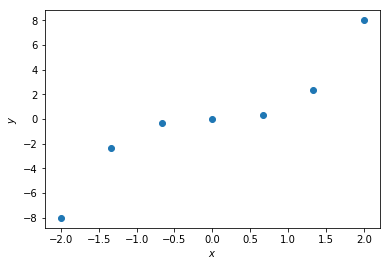

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Let's make several steps to build a decision tree. In the case of a **regression** task, at prediction time, the leaf returns the average value for all observations in this leaf.

Let's start with a tree of depth 0, i.e. all observations placed in a single leaf. 

<br>You'll need to build a tree with only one node (also called **root**) that contains all train observations (instances). 
<br>How will predictions of this tree look like for $x \in [-2, 2]$? <br> Create an appropriate plot using a pen, paper and Python if needed (but no `sklearn` is needed yet).

Mean value of target:  -0.0
STD of target:  4.462748902636089
Count examples:  7
MSE:  19.916127767979617


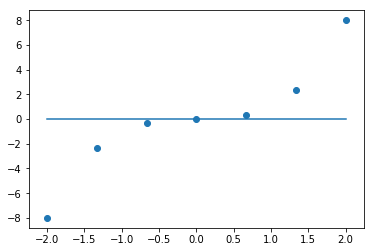

In [3]:
print('Mean value of target: ', round(y.mean()))
print('STD of target: ', y.std())
print('Count examples: ', y.size)
print('MSE: ', ((y - y.mean())**2).mean(axis=0))

plt.plot(X, np.full((7, 1), y.mean()))
plt.scatter(X, y)

In [4]:
tree_regressor_1 = DecisionTreeRegressor(max_depth=1, random_state=17)
tree_regressor_1.fit(X.reshape(-1, 1), y.reshape(-1, 1))

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

In [5]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [6]:
tree_graph_to_png(tree=tree_regressor_1, feature_names=['x'], png_file_to_save='tree_regressor_1.png')

**Making first splits.**
<br>Let's split the data according to the following condition $[x < 0]$. It gives us the tree of depth 1 with two leaves. To clarify, for all instances with $x \geqslant 0$ the tree will return some value, for all instances with $x < 0$ it will return another value. Let's create a similar plot for predictions of this tree.

In [7]:
def build_node(name, leaf):
    print('--------------------')
    print(name, leaf)
    print('Mean value of target: ', leaf.mean())
    print('STD of target: ', leaf.std())
    print('Count examples: ', leaf.size)
    print('MSE: ', ((leaf - leaf.mean())**2).mean(axis=0))
    print('--------------------')

    
def predict(leaf):
    return np.full((leaf.size), leaf.mean())

--------------------
Leaf 1 :  [-8.         -2.37037037 -0.2962963 ]
Mean value of target:  -3.5555555555555554
STD of target:  3.2547668253400652
Count examples:  3
MSE:  10.593507087334247
--------------------
--------------------
Leaf 2 :  [0.         0.2962963  2.37037037 8.        ]
Mean value of target:  2.666666666666666
STD of target:  3.2117753168413037
Count examples:  4
MSE:  10.315500685871056
--------------------


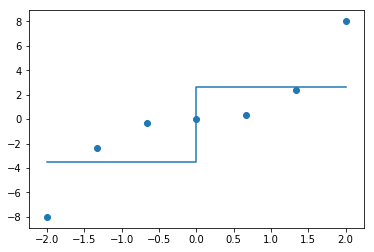

In [8]:
tree_leaf_1 = y[:3]
build_node("Leaf 1 : ", tree_leaf_1)
predict_1 = predict(tree_leaf_1)

tree_leaf_2 = y[3:]
build_node("Leaf 2 : ", tree_leaf_2)
predict_2 = predict(tree_leaf_2)

full_predict = np.concatenate((np.append(predict_1, predict_1[-1]), predict_2), axis=0)
full_index = np.concatenate((np.append(X[:3], X[3]), X[3:]), axis=0)

plt.plot(full_index, full_predict)
plt.scatter(X, y)

In the decision tree algorithm, the feature and the threshold for splitting are chosen according to some criterion. The commonly used criterion for regression is based on variance: $$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$
where $\large X$ and $\large y$ are a feature matrix and a target vector (correspondingly) for training instances in a current node, $\large X_l, y_l$ and $\large X_r, y_r$ are splits of samples $\large X, y$ into two parts w.r.t. $\large [x_j < t]$ (by $\large j$-th feature and threshold $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (or, the same, $\large |y|$, $\large |y_l|$, $\large |y_r|$) are sizes of appropriate samples, and $\large D(X, y)$ is variance of answers $\large y$ for all instances in $\large X$:
$$\large D(X, y) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$
Here $\large y_i = y(x_i)$ is the answer for the $\large x_i$ instance. Feature index $\large j$ and threshold $\large t$ are chosen to maximize the value of criterion  $\large Q(X, y, j, t)$ for each split.

In our 1D case,  there's only one feature so $\large Q$ depends only on threshold $\large t$ and training data $\large X$ and $\large y$. Let's designate it $\large Q_{1d}(X, y, t)$ meaning that the criterion no longer depends on feature index $\large j$, i.e. in 1D case $\large j = 1$.

Create the plot of criterion $\large Q_{1d}(X, y, t)$  as a function of threshold value $t$ on the interval $\large [-1.9, 1.9]$.

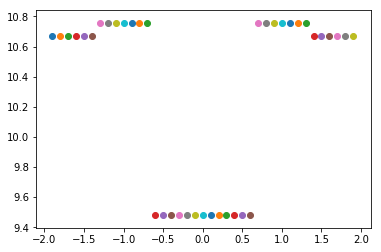

In [9]:
def var_around_mean(X, y):
    dim_X = len(X)
    full_sum = 0
    for j in range(dim_X):
        sub_sum = 0
        for i in range(dim_X):
            sub_sum += y[i]
        sub_sum = (y[j] - sub_sum / dim_X) ** 2
        full_sum += sub_sum
    return full_sum / dim_X 
    
def regression_var_criterion(X, y, t):
    dim_X = len(X)
    split_index = int(np.where(X >= t)[0][0])
    Xl = X[:split_index]
    Xr = X[split_index:]
    yl = y[:split_index]
    yr = y[split_index:]
    return var_around_mean(X, y) - len(Xl) / dim_X * var_around_mean(Xl, yl) - len(Xr) / dim_X * var_around_mean(Xr, yr)

for i in np.linspace(-1.9, 1.9, 39):
    Q = regression_var_criterion(X, y, round(i, 1))
    plt.scatter(i, Q)

**<font color='red'>Question 1.</font> What is the worst threshold value (to perform a split) according to the variance criterion?**

<font color = 'red'> **Answer options:** </font>
- -1.9
- -1.3
- 0 [+]
- 1.3
- 1.9 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Then let's make splitting in each of the leaves nodes. 
<br> Take your tree with first threshold [$x<0$].
<br> Now add a split in the left branch (where previous split was $x < 0$) using the criterion $[x < -1.5]$, in the right branch (where previous split was $x \geqslant 0$) with the following criterion $[x < 1.5]$. 
<br>It gives us a tree of depth 2 with 7 nodes and 4 leaves. Create a plot of this tree predictions for $x \in [-2, 2]$.

In [10]:
tree_leaf_1 = y[:1]
build_node("Leaf 1 : ", tree_leaf_1)
predict_1 = predict(tree_leaf_1)

tree_leaf_2 = y[1:3]
build_node("Leaf 2 : ", tree_leaf_2)
predict_2 = predict(tree_leaf_2)

tree_leaf_3 = y[3:6]
build_node("Leaf 3 : ", tree_leaf_3)
predict_3 = predict(tree_leaf_3)

tree_leaf_4 = y[6:]
build_node("Leaf 4 : ", tree_leaf_4)
predict_4 = predict(tree_leaf_4)

--------------------
Leaf 1 :  [-8.]
Mean value of target:  -8.0
STD of target:  0.0
Count examples:  1
MSE:  0.0
--------------------
--------------------
Leaf 2 :  [-2.37037037 -0.2962963 ]
Mean value of target:  -1.3333333333333337
STD of target:  1.0370370370370372
Count examples:  2
MSE:  1.0754458161865574
--------------------
--------------------
Leaf 3 :  [0.         0.2962963  2.37037037]
Mean value of target:  0.8888888888888884
STD of target:  1.054526247114203
Count examples:  3
MSE:  1.1120256058527649
--------------------
--------------------
Leaf 4 :  [8.]
Mean value of target:  8.0
STD of target:  0.0
Count examples:  1
MSE:  0.0
--------------------


In [11]:
def concat_array(left, communication, right):
    return np.concatenate((np.append(left, communication), right), axis=0)

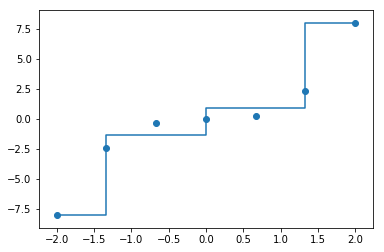

In [12]:
full_predict = concat_array(concat_array(predict_1, predict_1[0], predict_2), predict_2[0],concat_array(predict_3, predict_4[0], predict_4)) 
full_index = concat_array(concat_array(X[:1], X[1], X[1:3]), X[3], concat_array(X[3:6], X[5], X[6:]))

plt.plot(full_index, full_predict)
plt.scatter(X, y)

In [13]:
tree_regressor_2 = DecisionTreeRegressor(max_depth=2, random_state=17)
tree_regressor_2.fit(X.reshape(-1, 1), y.reshape(-1, 1))

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

In [14]:
tree_graph_to_png(tree=tree_regressor_2, feature_names=['x'], png_file_to_save='tree_regressor_2.png')

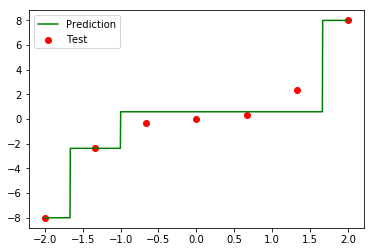

In [15]:
X_test = np.linspace(-2, 2, 1000)
reg_tree_pred = tree_regressor_2.predict(X_test.reshape(-1, 1))
plt.scatter(X, y, c='r', label='Test')
plt.plot(X_test, reg_tree_pred, c='g', label='Prediction')
plt.legend()

**<font color='red'>Question 2.</font> Tree predictions is a piecewise-constant function, right? How many "pieces" (horizontal segments in the plot that you've just built) are there in the interval [-2, 2]?**

<font color = 'red'> **Answer options:** </font>
- 2
- 4 [+]
- 6
- 8

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

## 2. Building a decision tree for predicting heart diseases
Let's read the data on heart diseases. The dataset can be downloaded from the course repo from [here](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) by clicking on `Download` and then selecting `Save As` option. If you work with Git, then the dataset is already there in `data/mlbootcamp5_train.csv`.

**Problem**

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [16]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [17]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: 
- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$) 
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [18]:
df['age_in_years'] = (df['age'] / 365.25).astype('int')
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [19]:
X = df.drop(columns=['cardio'], axis=1)
y = df['cardio']
X.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_in_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


Split data into train and holdout parts in the proportion of 7/3 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz. Here we need to mention that `sklearn` doesn't draw decision trees on its own, but is able to output a tree in the `.dot` format that can be used by Graphviz for visualization. 

In [21]:
tree_classifier_1 = DecisionTreeClassifier(max_depth=3, random_state=17)
tree_classifier_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [22]:
tree_graph_to_png(tree=tree_classifier_1, feature_names=X_train.columns, png_file_to_save='tree_classifier_1.png')

Take a look how trees are visualized in the [3rd part](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true) of course materials.

<img src='tree_classifier_1.png'>

**<font color='red'>Question 3.</font> Which 3 features are used to make predictions in the created decision tree?**

<font color = 'red'> **Answer options:** </font>
- age, ap_lo, chol=1
- age, ap_hi, chol=3 [+]
- smoke, age, gender
- alco, weight, gluc=3

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Make predictions for holdout data `(X_valid, y_valid)` with the trained decision tree. Calculate accuracy.

In [23]:
tree_classifier_1_prediction = tree_classifier_1.predict(X_valid)

In [24]:
acc1 = accuracy_score(y_valid, tree_classifier_1_prediction)

Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

In [25]:
%%time
tree_params = {'max_depth': list(range(2, 11))}
tree_classifier_2 = DecisionTreeClassifier(random_state=17)
tree_classifier_grid = GridSearchCV(tree_classifier_2, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_classifier_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


CPU times: user 515 ms, sys: 171 ms, total: 686 ms
Wall time: 2.71 s


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.6s finished


In [26]:
tree_classifier_grid.best_score_, tree_classifier_grid.best_params_

(0.7319591836734693, {'max_depth': 6})

Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

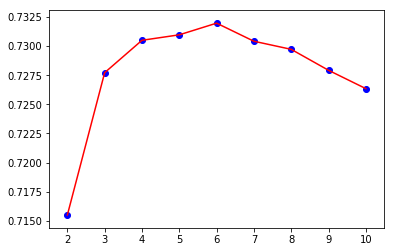

In [27]:
mean_score = tree_classifier_grid.cv_results_['mean_test_score']

plt.plot(list(range(2, 11)), mean_score, c='r')
plt.scatter(list(range(2, 11)), mean_score, c='b')

Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

In [28]:
tree_classifier_grid_prediction = tree_classifier_grid.predict(X_valid)
acc2 = accuracy_score(y_valid, tree_classifier_grid_prediction)

Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [29]:
print('Accuracy gain: ', round((acc2 - acc1) / acc1 * 100, 3), '%')

Accuracy gain:  0.627 %


**<font color='red'>Question 4.</font> Choose all correct statements.**

<font color = 'red'> **Answer options:** </font>

- There exists a local maximum of accuracy on the built validation curve [+]
- `GridSearchCV` increased holdout accuracy by **more** than 1%
- There is **no** local maximum of accuracy on the built validation curve
- `GridSearchCV` increased holdout accuracy by **less** than 1% [+]

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Take a look at the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. [Source paper](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='../../img/SCORE2007-eng.png' width=70%>

Let's create new features according to this picture:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

In [30]:
def group_age(x):
    if x >= 40 and x < 50:
        return 1
    elif x >= 50 and x < 55:
        return 2
    elif x >= 55 and x < 60:
        return 3 
    elif x >= 60 and x < 65:
        return 4 
    else:
        return 0
    
    
def group_ap_hi(x):
    if x >= 120 and x < 140:
        return 1
    elif x >= 140 and x < 160:
        return 2
    elif x >= 160 and x < 180:
        return 3 
    else:
        return 0

In [31]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', index_col='id', sep=';')
new_df = pd.DataFrame() 
new_df['gender'] = df['gender'].map({1 : 0, 2 : 1})
new_df['smoke'] = df['smoke']
new_df['cholesterol'] = df['cholesterol']
new_df['age'] = (df['age'] / 365.25).astype('int').apply(group_age)
new_df['ap_hi'] = df['ap_hi'].apply(group_ap_hi)
new_df = pd.get_dummies(new_df, columns=['cholesterol', 'age', 'ap_hi'])
X = new_df.drop(['age_0', 'ap_hi_0'], axis=1)
y = df['cardio']
X.head(10)

,gender,smoke,cholesterol_1,cholesterol_2,cholesterol_3,age_1,age_2,age_3,age_4,ap_hi_1,ap_hi_2,ap_hi_3
id,,,,,,,,,,,,
0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,1,0
2,0,0,0,0,1,0,1,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,1,0,1,0,0
9,0,0,0,0,1,0,0,0,1,1,0,0
12,1,0,0,0,1,0,0,0,1,1,0,0
13,0,0,1,0,0,1,0,0,0,0,0,0


In [32]:
X.shape, y.shape

((70000, 12), (70000,))

If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero. 

<br>Add a ``smoke`` feature.
<br>Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

**<font color='red'>Question 5.</font> Which binary feature is the most important for heart disease detection (i.e., it is placed in the root of the tree)?**

<font color = 'red'> **Answer options:** </font>

- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- Systolic blood pressure from 140 to 160 (mmHg)[+]
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

In [35]:
tree_classifier_3 = DecisionTreeClassifier(max_depth=3, random_state=17)
tree_classifier_3.fit(X, y)
tree_graph_to_png(tree=tree_classifier_3, feature_names=X.columns, png_file_to_save='tree_classifier_10000.png')

<img src='tree_classifier_3.png'/>